<a href="https://colab.research.google.com/github/prakaa/sola5050/blob/main/SOLA5050_Week4_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

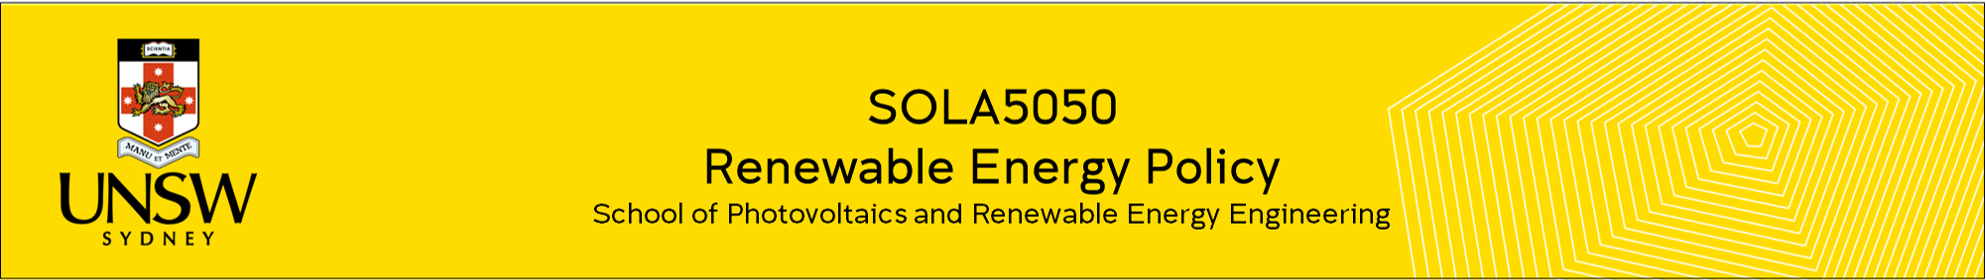

Notebook compiled by Dr. Jessie Copper

## Introduction to Python, Notebooks and Colab

### Python Coding
**You won't need to write any Python for this tutorial (unless you want to!). However, you will need to run this notebook to get data that you can then analyse in another tool (e.g. Excel).** That being said, it's a pretty handy skill for data analysis and modelling. There will also be an opportunity to analyse data for the Week 7 Tutorial in Python.

#### Resources for Python
* [Python Basics Notebook written by Jessie Copper](https://colab.research.google.com/drive/1vUe9gk74sqL0qoX7MFywr5HAh1EFjTUh)
*   [A Whirlwind Tour of Python](https://nbviewer.jupyter.org/github/jakevdp/WhirlwindTourOfPython/blob/master/Index.ipynb), an intro to the basics of Python and an introductory text for...
*   [Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb), a fantastic resource that will introduce you to handling and analysing data in Python. All of the chapters contain examples that can be run within Colab!

### Colab Features
Colab notebooks are a quick way to start coding, or to even learn how to code. It's worth pointing out some useful features of Colab/Jupyter Notebooks if you use them for this course or another.

#### Overview
[This notebook](https://colab.research.google.com/notebooks/basic_features_overview.ipynb) contains a brief rundown of Colab functionality.

#### Python (Code)
Colab gives you hints when writing code (autocompletion), and if you hover over a function or variable (in blue in a code cell), Colab gives you access to the documentation.

#### Text
Simply hover between cells to add a Text cell. The top of the Text cell will have options for writing text in [Markdown](https://guides.github.com/features/mastering-markdown/).


### Jupyter Notebooks and Google Colab

This page is a Jupyter Notebook. Jupyter Notebooks are 'coding' workbooks, where text, equations, code and results (e.g. tables and plots) can live in the same document. Jupyter Notebooks are often written in the Python programming language and can be run *locally* (i.e. on your computer) or on the cloud. This Jupyter Notebook is being run on the cloud using Google's Colab service.

<a name="how-to"></a>
### How to use this notebook

Notebooks consist of text cells (such as this one) or code cells. To make this notebook more compact and easier to read and use, some of the code cells have been modified to include text with some explanations. You'll need to 'run' all the code cells below.

#### Running code cells
For the notebook to work, you'll need to run the code cells. There are a couple of ways to do this:
1. Press the Play button that appears next to the top left hand corner of the code cell. You'll need to do this for all of the code cells in the notebook.
2. Press `Ctrl+Enter` to run a cell or `Shift+Enter` to run a cell and move to the next cell. You'll need to do this for all of the code cells in the notebook.
3. In the toolbar, click on 'Runtime' and then 'Run All' (`Ctrl+F9`). This will run all the code cells.

#### Viewing code
In this notebook, some of the code cells for the Dispatch Simulator are hidden. If you'd like to view the code being run, double click on the whitespace (blank) area below the text but above the output window. This will reveal the code.

# Week 4 Tutorial Activities

**The Week 4 tutorial discussion will compare the *Australian Renewable Energy Target (RET)* policy and the *ACT reverse auction scheme* as types of *Green Certificate* and *Auction/Tender* policies for supporting Renewable Energy (RE) deployment.**

## How to do this week's activities

### Groups 1, 3 and 4

You have two options for completing analysis for the tutorial. Make sure you read [*How to use this notebook*](#how-to) before proceeding:
1. Run the cell below [Data Generation](#data-gen) and then do all of your analysis in Python. The data will be in the pandas DataFrame `df`.
2. Run **both** of the cells below [Data Generation](#data-gen). This will allow you to download LGC & Spot Price data in the form of a csv. You can then analyse the data using another application (e.g. Excel, R)

### Group 2
You have two options for completing analysis for the tutorial. Make sure you read [*How to use this notebook*](#how-to) before proceeding:
1. Run the cells below [Dispatch Simulator](#ed-sim) (up to *Download data in a .csv*) and then do all of your analysis in Python. Once you've run the Dispatch Simulator, the data will be in the pandas DataFrame `disp`.
2. Run **every** cell below [Dispatch Simulator](#ed-sim). This will run the code to bring up the interactive Dispatch Simulator. Once you've run the Dispatch Simulator, you can then run the following cell to download the dispatch results in a csv. You can then analyse the data using another application (e.g. Excel, R)


## Code

In [ ]:
#@title Package imports and installation
#@markdown In this notebook, we will be using a couple of Python *packages*.
#@markdown Packages contain useful chunks of code that make it easier to do
#@markdown certain things in Python. This includes providing common functions 
#@markdown and useful [*objects*](https://realpython.com/python3-object-oriented-programming/).
#@markdown In particular, we will be using the numerical computing package *numpy*,
#@markdown the data analysis package *pandas* and the plotting package *matplotlib*.

#@markdown To import a package such a pandas, you can use:
#@markdown `import pandas`. In this notebook, we will import these using an
#@markdown alias (or shorthand) so we don't have to write the full package name every time we use it (e.g. `import numpy as np`
#@ markdown allows us then call the square root function as follows: `np.sqrt())`.
#@markdown You can also selectively import certain functions and classes
#@markdown by using `from`, e.g. `from pandas import read_csv`.

# numerical computing package
import numpy as np

# data analysis package
import pandas as pd

# plotting
import matplotlib.pyplot as plt

# widgets (interactive stuff) for dispatch simulator
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed

# for csv download
from google.colab import files

<a name="data-gen"></a>
### Data Generation for Groups 1, 3 and 4

In [ ]:
''' 
The following lines of code:
(1) Imports the data from the "Week_4.csv" file hosted on GitHub into a pandas DataFrame;
(2) Generates a Datetime index;
(3) Cleans up the DataFrame by dropping redundent columns of data;
(4) Relabels the column headers with shorter heading labels;
(5) Creates a dictionary of LGC prices;
(6) Maps the dictionary of LGC prices to the year attribute of each row of data;
 and (7) Prints out the first and last 5 lines of the resultant DataFrame.
'''

# Read the 'Week_4.csv' data file into a new pandas dataframe labelled df
df = pd.read_csv('https://raw.githubusercontent.com/prakaa/sola5050/main/data/Week_4.csv')

# Print out the column labels of the data to ensure there is a record of the units and magnitude of each Wind Farm
print ('Raw data columns:\n', df.columns.tolist())

# Create a pandas datetime index for the dataframe using the 'Datetime' column
df.index = pd.to_datetime(df['Datetime'], format="%d/%m/%Y %H:%M")

# Clean up the dateframe by removing the redundant columns of 'Date', 'Time' and 'Datetime'
df.drop(['Date','Time','Datetime'], axis=1, inplace=True)

# Relabel the columns of the dataframe to shorter column labels
df.columns = ['SP NSW','SP SA','Gunning NSW','Lake Bonney SA']

# Create a dictionary of LGC prices over the time period 2014 to 2016 (both inclusive)
LGC_dict = {2014: 35.24, 2015: 29.38, 2016: 85.16}

# Map the annual LGC price to each row of the dataframe to create a column of LGC Prices
df['LGC Price'] = df.index.year.map(LGC_dict)

# Print the output of the first 5 rows of the dataframe
print('\nFirst 5 rows')
display(df.head())

# Print the output of the last 5 rows of the dataframe
print('\nLast 5 rows')
df.tail()

In [3]:
#@title Download data in a `.csv`
#@markdown Run this cell if you want to download the data.
try:
    df.to_csv('Wind_Farm_Output_and_LGCandSpot_Prices.csv')
    # downloads the csv
    files.download('Wind_Farm_Output_and_LGCandSpot_Prices.csv')
except Exception as e:
    print('Run the cell above this one before trying to download data.')

Run the cell above this one before trying to download data.


***

<br>

## Group 1

### Revenue uncertainty for generators under the RET vs ACT reverse auction scheme

- Explain the concept of long-run marginal cost (LRMC) for a generator.
- Calculate how much revenue Lake Bonney (SA) and Gunning (NSW) wind farms would have made in 2014, 2015 and 2016 (respectively):
> 1. Under the spot price plus the LRET; and
> 2. Under the ACT reverse-auction scheme, assuming they were awarded a feed-in tariff of $89.10/MWh (the same as Sapphire Stage 1 source).
    
- Assume that the long-run marginal cost (LRMC) of the wind farm is $89.10.
- From your findings, what are the benefits and drawbacks of the ACT reverse auction scheme compared to selling energy on the spot market plus certificates (LGCs)?
- Comment on how revenue uncertainty might impact investment under the two scenarios.

<br>
<div style="padding: 20px; background-color:#fff8cc;">
    
**Hints:** <br>
- Put the relevant wind generation data and the relevant NEM spot price data side-by-side.
- Using the wind generation data and spot-market data from the 'df' DataFrame, calculate the revenue earned on the spot market by Lake Bonney and Gunning wind farms through 2014, 2015 and 2016.
- Calculate the total monthly revenue for these generators (normalised to a per-MW nameplate basis) under:
> - the spot price plus the RET$^1$; and
> - the ACT reverse auction FiT scheme,
 
- In each scenario, for each month, is Revenue greater than LRMC?
- Currently, LRET prices are around $35 and declining over forward markets. Explore the impact that current and future LGC prices would have on a wind generator's revenue.

*$^1$ Use the LGC price data provided to estimate revenue from the LRET scheme, but note that certificates (LGCs) under the RET must be handed over to the ACT government for retirement (not sold).*
    
</div>

In [ ]:
 # Start your code here, and insert more code cells as needed...
 

***

<br> 

## Group 2

### Impact of the RET on Electricity Prices

The purpose of this exercise is to gain an understanding of how the NEM's dispatch process works and the ways in which it is affected by renewable merit order impacts.

- Explain the concept of short-run marginal cost (SRMC) and how it is different to long-run marginal cost (LRMC).
- In an electricity market, generators typically bid in at their SRMC. How do they make enough money to recover their LRMC if they are only bidding at their SRMC?
- Discuss the revenue implications of renewables bidding in at their SRMC in high-penetration scenarios.
- Explain how the renewable energy target scheme might impact a renewable generators bidding strategy.

<br>
<div style="padding: 20px; background-color:#fff8cc;">
    
**Hints:** <br>
- Assume that the levelised cost of electricity (LCOE) of an onshore wind farm is $89.10/MWh (as per Sapphire's ACT FiT bid).

- The 'Dispatch Simulator' presented below depicts a hypothetical set of bids, to be submitted to the NEM in one time period.
- At the moment, the bids submitted by the renewable generators are set at $100,000 to represent the fact that they are not in the market.
- Note the current marginal generator and its bid (the market clearing price).


> Tasks:
> 1. Bid in the Gullen range wind fram at its SRMC. What happened to the marginal generator and the market clearing price? Is Gullen range currently earning enough for long-term profitability?
> 2. Now, also bid in the Capital wind farm at its SRMC. What happened to the marginal generator and the market clearing price? Are the two wind farms earning enough long-term profitability?
> 3. Now bid in the remaining renewable generators at their SRMCs. What happened to the marginal generator and the market clearing price?


- Note the proportion of fossil fuel generators still in the market before and after these changes.
- Consider the long-term profitability of generators as more and more renewables are bid into the market.
- Consider the effective short-run marginal cost of wind farms when the RET is taken into account. (Assume a current LRET price of \$80/MWh and then \$10).
    
        
 </div>

<a name="ed-sim"></a>
### Dispatch Simulator for Group 2

In [ ]:
#@title # Generator Properties
#@markdown *Run this cell*

#@markdown This cell contains code and functions that imports generator data
#@markdown from a `.csv` hosted on GitHub. You can filter or copy the data
#@markdown by using the magic wand symbol to the right of the table.

# Read in CSV data to generate the Dispatch Simulator
df2 = pd.read_csv('https://raw.githubusercontent.com/prakaa/sola5050/main/data/Week_4_p2.csv',
                  index_col=0)
# Calculate the current output based on the MW capacity and the original % of available output
df2['Current Output (MW)'] = (
    df2['Capacity (MW)'] * df2['Current Available Output (%)']
)
# Calculate the Cumulative output in MW
df2['Cumulative Output (MW)'] = df2['Current Output (MW)'].cumsum()
# Generate a list of renewable energy generators based on the Fuel type
RE_list = list(df2.loc[(df2.Fuel == 'Solar') | (df2.Fuel == 'Wind')].index.values)
# Generate a list of all generators
Gen_list = list(df2.index.values)
# Display the dataframe. You can use this dataframe to visualise the SRMC and other parameters for each generator
display (df2)
 

In [ ]:
#@title # Dispatch Simulator
#@markdown *Run this cell*

#@markdown This cell contains background and main code to run the dispatch 
#@markdown simulator.

#@markdown For the Dispatch Simulator you can either select (1) a single 
#@markdown generator at a time or (2) all generators. 
#@markdown Use the 'Generator' dropbown box to make a selection:
#@markdown - If you select a single generator enter the corresponding bid price and available output in the 'Bid Price' and 'Current Available Output' fields.
#@markdown - Enter the 'Current Available Output' as a value in the range 0 to 1. For example, if only 25% of the capacity is currently available enter a value of 0.25.
#@markdown - If you select the option 'All at SRMC', then all of the generators will bid in at their SRMCs. The 'Bid Price' and 'Current Available Output' fields will be ignored if this option is selected. 
#@markdown - If you select 'All at Bid Price', then all of the renewable energy generators will bid in at the price you define in the 'Bid Price' field. The 'Current Available Output' fields will be ignored if this option is selected.
#@markdown 
#@markdown You can set the current demand by typing in a value in the Demand field. The starting default value is 4000 MW.
#@markdown 
#@markdown The 'Table Status' field allows you to choose between whether to update the existing table or to reset the table from the original starting state.
#@markdown 
#@markdown When you're ready to run the simulator and view the output of the dataframe, hit the 'Run Interact' button.

def adjust_bid_price(df, power_station, current_bid, 
                     current_available_output=None):
    '''
    Definition of a function which allows for the current bid price of a 
    specified generator to be adjusted.
    ''' 
    df.loc[power_station,'Current Bid ($)'] = current_bid
    if current_available_output != None:
        df.loc[power_station, 'Current Available Output (%)'] = current_available_output
    df.sort_values('Current Bid ($)', inplace=True)
    # Recalculate current output and cumulative output
    df['Current Output (MW)'] = (
        df['Capacity (MW)'] * df['Current Available Output (%)']
    )
    df['Cumulative Output (MW)'] = df['Current Output (MW)'].cumsum()


def market_clearing_price(df, demand):
    '''
    Definition of a function to return the market clearing price given an input
    of current demand.
    '''
    d = min(demand, df['Cumulative Output (MW)'].max())
    Market_Clearing_Price = df.loc[df['Cumulative Output (MW)'] >= d].iloc[0,4]
    print ('The Market Clearing Price is: $', Market_Clearing_Price)

def dispatch_simulator(df, selection, demand, bid_price, available_output,
                       reset):
    '''
    Definition of a function to run the Dispatch Simulator.
    '''
    if reset == 'Reset Table':
        wdf = df2.copy()
    else:
        wdf = df
    
    if selection == 'All at SRMC':
        for gen in Gen_list:
            srmc = wdf.loc[gen,'SRMC ($/MWh)']
            print (gen, srmc)
            adjust_bid_price(wdf,gen,srmc)
            
    elif selection == 'All at Bid Price':
        for gen in Gen_list:
            adjust_bid_price(wdf,gen,bid_price)
    else:
        adjust_bid_price(wdf,selection,bid_price,available_output)
        
    market_clearing_price(wdf,demand)
    display(wdf)
    return wdf

# Widget List
new_list = Gen_list.copy()
new_list.append('All at SRMC')
new_list.append('All at Bid Price')
style = {'description_width': 'initial'}
RE_select = widgets.Dropdown(
    options= new_list,  description='Generator:',style=style
    )
bid_price_input = widgets.BoundedFloatText(
    value=1, min=0, max=100000.0, description='Bid Price $:',  style=style
    )
available_output_input = widgets.BoundedFloatText(
    value=0.5, min=0, max=1,  description='Current Available Output (0-1):',
    style=style
    )
demand_input = widgets.BoundedFloatText(
    value=4000, min=0, max=10000.0, description='Demand (MW):', style=style
    )
reset_widget = widgets.ToggleButtons(
    options=['Update Table', 'Reset Table'],value='Update Table',
    description='Table Status:', style=style
    )

# Interactive statement
wdf = df2.copy()
disp = interactive(dispatch_simulator, {'manual':True},
                   df = fixed(wdf),  selection = RE_select,
                   demand = demand_input, bid_price = bid_price_input, 
                   available_output = available_output_input,
                   reset = reset_widget)
disp
 

In [1]:
#@title Download data in a `.csv`
#@markdown Run this cell if you want to download the data.
try:
    disp.result.to_csv('Dispatch_Simulator_Results.csv')
    # downloads the csv
    files.download('Dispatch_Simulator_Results.csv')
except Exception as e:
    print('Run the Simulator (Run Interact) before running this cell')


Run the Simulator (Run Interact) before running this cell


***
<br>

## Group 3

### Implications of the Reverse Auction Scheme for the ACT

The ACT government's reverse auction scheme pays fixed feed-in-tariffs to renewable generators. The feed-in tariffs are paid through a 'contract of difference' scheme.

- Explain how this system works.
- Based on the provided historical NEM prices and wind generation data, chart the monthly payments made between the renewable generator and ActewAGL, assuming the tariff is $89.10.
- Comment on the observed trends with regards to the flow of payments (i.e. how much is the policy costing (or earning) ACT electricity consumers?)
- Generators do not have to be in the same NEM region (i.e. the same electricity market) as the ACT. Discuss any risks the Government/ActewAGL may be exposed to due to this allowance.


In [ ]:
 # Start your code here, and insert more code cells as needed...

 

***
<br>

## Group 4

### Implications of the Reverse Auction Scheme for Developers

The purpose of this exercise is to explore the incentives of different policies for siting of generators.

- Explore the differences in energy generated and spot revenue for different wind farms.
- Comment on how the reverse auction scheme and the RET might produce different incentives to optimise wind farm siting for either volume of energy generated, or correlation with spot prices.

<br>
<div style="padding: 20px; background-color:#fff8cc;">
    
**Hints:** <br>

- Put the generation data of the two wind farms next to the spot market prices in their corresponding regions.
- Plot the generations and spot market earnings across the period.
- On a MWh per-MW-nameplate basis, which generator was more effective at generating energy?
- On a dollars-per-MW nameplate basis, which wind farm was more profitable?
- Which generator earned a higher average \\$/MWh for this period?
- Estimate the revenue from each generator under the ACT's reverse auction scheme, assuming they were awarded the same feed-in tariff as Sapphere Stage 1 ($89.10/MWh). Which was more profitable on a dollars-per-MW-nameplate basis?

</div>

In [ ]:
 # Start your code here, and insert more code cells as needed...

 